<h1 style="text-align:center;color:tomato;">Ford Go Bike Data(Exploratory Analysis)</h1>
<h3 style="text-align:center;color:tomato;">By Ishan Arora</h3>

## Importing the Libraries

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

%matplotlib inline

In [17]:
import glob
import os

## Data Wrangling

### Gathering of Data ( Via local files)

### We will merge all 12 datasets into one using glob and os libraries

In [35]:
#Setting the path where the 12 datasets are 
path ='/Users/ishan/Downloads/Communicate Data Findings/Data'

In [42]:
#With the help of glob and os merging the 12 datasets into single master dataset
frames = [pd.read_csv(f) for f in glob.glob(os.path.join(path, '*.csv'))]
result = pd.concat(frames, ignore_index=True)
result.sample(5)



,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
1131301,434,2018-07-16 18:07:16.3300,2018-07-16 18:14:30.7310,66.0,3rd St at Townsend St,37.778742,-122.392741,16.0,Steuart St at Market St,37.794130,-122.394430,1456,Subscriber,No
1191245,587,2018-07-07 15:03:31.4930,2018-07-07 15:13:19.0420,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,2568,Subscriber,No
1363193,511,2018-08-09 18:30:04.5180,2018-08-09 18:38:36.0020,126.0,Esprit Park,37.761634,-122.390648,81.0,Berry St at 4th St,37.775880,-122.393170,2509,Customer,No
1325046,469,2018-08-16 06:43:04.9070,2018-08-16 06:50:54.8940,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4052,Subscriber,No
161191,1460,2018-11-14 20:05:35.2010,2018-11-14 20:29:55.5240,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,115.0,Jackson Playground,37.765026,-122.398773,1012,Subscriber,No


In [43]:
#exporting as csv
result.to_csv('fordgo_master.csv', index = False)


In [44]:
df = pd.read_csv('fordgo_master.csv')


### Assessing of Data

In [45]:
#visually assessing the data
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No
3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No
4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes


In [47]:
#checking for the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
dtypes: float64(6), int64(2), object(6)
memory usage: 199.1+ MB


In [48]:
#checking for duplicates
sum(df.duplicated())

0

In [49]:
#checking for null values
df.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           11771
start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_id             11771
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

In [51]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03


### Assessing Summary
* There are no duplicate values or null values
* A lot of datatypes needs to be changed
* start_time and end_time needs to be splitted into duration in minute,day,month


## Data Cleaning

#### Copying the dataset

In [62]:
#copying the dataset 
df_copy=df.copy()

### 1.
#### Define: Changing the datypes of various columns

#### Code:

In [63]:
#converting user_type to categorical
df_copy['user_type'] = df_copy['user_type'].astype('category')

#converting start_time and end_time to datetime format
df_copy['start_time'] = pd.to_datetime(df_copy['start_time'])
df_copy['end_time'] = pd.to_datetime(df_copy['end_time'])

df_copy['start_station_id'] = df_copy['start_station_id'].astype('str')
df_copy['end_station_id'] = df_copy['end_station_id'].astype('str')
df_copy['bike_id'] =df_copy['bike_id'].astype('str')

#### Test:

In [64]:
#confirming the datasets
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  category
bike_share_for_all_trip    object
dtypes: category(1), datetime64[ns](2), float64(4), int64(1), object(6)
memory usage: 186.6+ MB


### 2.
#### Define:Create new columns for days of week,month,hour

#### Code:

In [65]:
#minutes will be very helpful so making a new column
df_copy['duration_minute'] = df_copy['duration_sec']/60

# splitting the start_time into hour,day,date,month
df_copy['start_hour'] = df_copy.start_time.dt.strftime('%H')
df_copy['start_day'] = df_copy.start_time.dt.strftime('%A')
df_copy['start_date'] = df_copy.start_time.dt.strftime('%Y-%m-%d')
df_copy['start_month'] = df_copy.start_time.dt.strftime('%B')

#### Test:

In [66]:
df_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,duration_minute,start_hour,start_day,start_date,start_month
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No,9.966667,23,Wednesday,2018-02-28,February
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No,15.716667,23,Wednesday,2018-02-28,February
2,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No,309.783333,18,Wednesday,2018-02-28,February
3,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No,309.300000,18,Wednesday,2018-02-28,February
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes,14.750000,23,Wednesday,2018-02-28,February


### 3.
#### Define: Need to change dataype of the varaibles I created.


#### Code 

In [81]:
#changing the datatype of newly crated variables
df_copy['start_month'] = df_copy['start_month'].astype('category')

df_copy['start_day'] = df_copy['start_day'].astype('category')




#### Test

In [86]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 19 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  category
bike_share_for_all_trip    object
duration_minute            float64
start_hour                 object
start_day                  category
start_date                 object
start_month                category
dtypes: category(3), datetime64[ns](2), float64(5), int64(1), object(8)
memory usage: 232.8+ MB


In [87]:
#Finally making it original one
df=df_copy.copy()

In [175]:
#Exporting it
df.to_csv('fordgobike_master.csv', index=False)


### What is the structure of your dataset?


>  There are 1863721 entries,in our dataset with 20 variables. The datset consists of data from over 12 months from January 2018-December 2018
> The variables are as follows:
* duration,start_time,end_time(This is basically the duration info)
* start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude(This is basically station info)
* bike_id, user_type, bike_share_for_all_trip(This is the member info. Also it is private)<br>
<b>Apart from that I made some columns which will be usefull for our analysis:</b>
- startdate,startmonth,starthour,startweek

### What is/are the main feature(s) of interest in your dataset?¶

> <p style="font-size:17px;">Well there are many things I would like to explore. I would like to find patterns between customers and subscribers, i would like to find the effect of month/day/year with the count of rides. Apart from that I am also interested in finding relations between trip duration in minutes and things like that.Does it matter if user is a subscriber?I would also like to do some analysis on  bike_share_for_all_trip 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  <p style="font-size:17px;">This dataset has a lot of useful information that would help me to draw conclusions. With the help of start_time column I  am able to get start day,month,year,day of week which will be usefull for my analysis. Also I can use duration minute feature for some analysis on average duration . User type feature will give me a great insight on how being a customer or a subsciber varies. I will also use bike_share_trip_for_all to help me get someinsights on if it is a valuable factor or not.

<h1 style="text-align:center;color:tomato;">Univariate Exploration</h1>

> As the name suggests this section would help me investigate distribution of individual variables. So let's dive into it.

###  Okay, Lets see how count varies with Month

In [78]:
#setting the base color
base_color=sb.color_palette()[0]

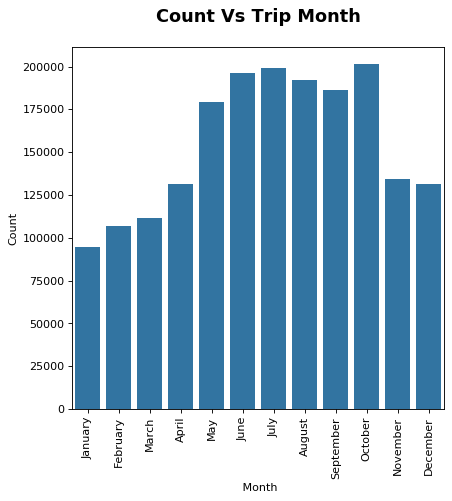

In [138]:
#defining figure size
fig=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')



order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sb.countplot(data=df, x='start_month',order=order,color=base_color);
#for better visbility rotating the ticks by 90
plt.xticks(rotation=90);
plt.xlabel(' Month');
plt.ylabel('Count');
plt.title('Count Vs Trip Month', y=1.05, fontsize=16, fontweight='bold', color = 'black');

Well As we can obseve:
* All winter months have less counts given the fact it is too cold(Nov-Feb)
* Summer months have a relatively larger count. (May-Sept)
* It peaks in October which is the most pleasant month

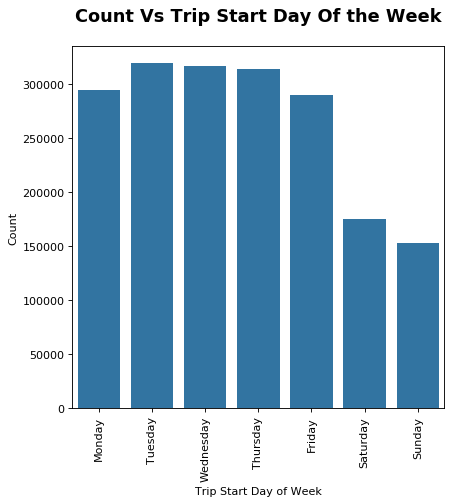

In [137]:
fig=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')


order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(data=df, x='start_day', color=base_color,order=order);
plt.xlabel('Trip Start Day of Week');
plt.xticks(rotation=90);
plt.ylabel('Count');
plt.title('Count Vs Trip Start Day Of the Week', y=1.05, fontsize=16, fontweight='bold', color = 'black');

What we observe :
* Count in weekdays is pretty much high than count in weekends
* In the weekdays Monday has the lowest count. Monday is notorously famous for this
* This shows people mostly use it for office rather than recreation

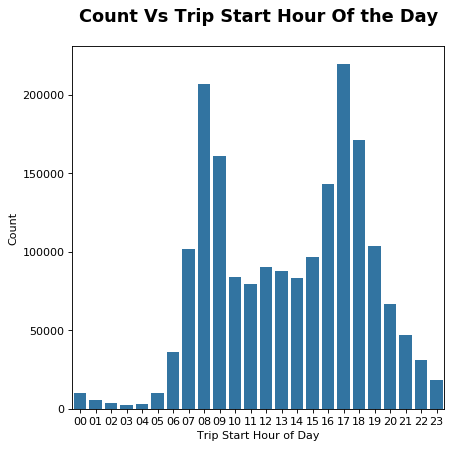

In [136]:
fig=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')


sb.countplot(data=df, x='start_hour', color=base_color);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');
plt.title('Count Vs Trip Start Hour Of the Day', y=1.05, fontsize=16, fontweight='bold', color = 'black');

What we observe:
* It peaks at 8AM and 5PM two of the most common times of office going and coming back resp.
* At late night also some people do love cycling

In [106]:
#lets see how the user are divided
user_type=df['user_type'].value_counts()

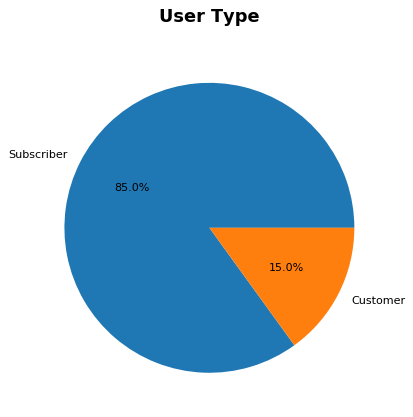

In [120]:
fig=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')



plt.pie(user_type,labels=user_type.index,autopct= '%1.1f%%')
plt.title('User Type', y=1.05, fontsize=16, fontweight='bold', color = 'black');

* Wow thats a huge number of people that have subscribed. Well having subscribed gives you a loads of benifits. And people love that.

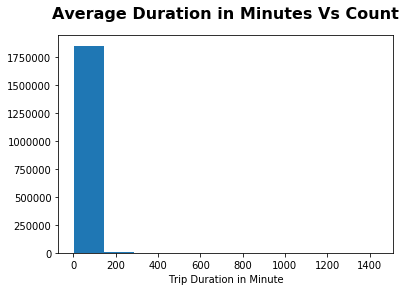

In [140]:
#plotting a histogram
plt.hist(data=df, x='duration_minute');
plt.xlabel('Trip Duration in Minute');
plt.title('Average Duration in Minutes Vs Count', y=1.05, fontsize=16, fontweight='bold', color = 'black');

Well this tells that there might be an outlier in this data.Lets figure out how to remove this outlier

In [128]:
#checking for outliers
df.duration_minute.describe(percentiles=[.95])

count    1.863721e+06
mean     1.428838e+01
std      3.950631e+01
min      1.016667e+00
50%      9.266667e+00
95%      3.028333e+01
max      1.439433e+03
Name: duration_minute, dtype: float64

In [129]:
#checking for outliers(cont.)
df.duration_minute.describe(percentiles=[.99])

count    1.863721e+06
mean     1.428838e+01
std      3.950631e+01
min      1.016667e+00
50%      9.266667e+00
99%      9.221667e+01
max      1.439433e+03
Name: duration_minute, dtype: float64

Since 99 percent of the trips were less than 90 minutes so we will plot a graph till hundered minutes.

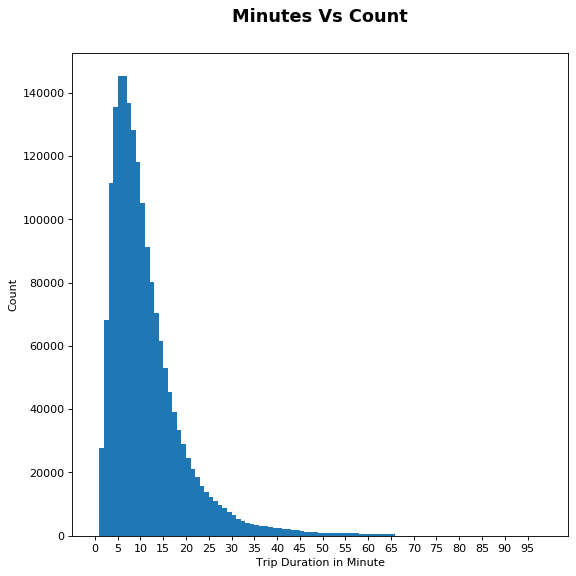

In [190]:
fig=plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')


bins = np.arange(0, 100, 1)
ticks = np.arange(0, 100, 5)
plt.hist(data=df, x='duration_minute', bins=bins);
plt.xticks(ticks);
plt.xlabel('Trip Duration in Minute');
plt.ylabel('Count')
plt.title('Minutes Vs Count', y=1.05, fontsize=16, fontweight='bold', color = 'black');

Lets remove these outliers and focus on most common cases

In [142]:
# removing the values whose average minites>90
df= df.query('duration_minute <= 90')
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1835478 entries, 0 to 1863720
Data columns (total 19 columns):
duration_sec               1835478 non-null int64
start_time                 1835478 non-null datetime64[ns]
end_time                   1835478 non-null datetime64[ns]
start_station_id           1835478 non-null object
start_station_name         1824136 non-null object
start_station_latitude     1835478 non-null float64
start_station_longitude    1835478 non-null float64
end_station_id             1835478 non-null object
end_station_name           1824136 non-null object
end_station_latitude       1835478 non-null float64
end_station_longitude      1835478 non-null float64
bike_id                    1835478 non-null object
user_type                  1835478 non-null category
bike_share_for_all_trip    1835478 non-null object
duration_minute            1835478 non-null float64
start_hour                 1835478 non-null object
start_day                  1835478 non-null categ

In [173]:
#calculating the mean 
df['duration_minute'].mean()

11.310417903855745

* Average duration is of cycling is around 11 minutes. But we have seen a lot of outliers too

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Since I did cleaned the data thorougly ditributions were pretty normal. There were some interesting observations throughout the jourrny. **But there was one place where outliers were there** . The duration in minutes had a few outliers.
**I performed the transformation and filtered out the outliers since we would want our data to focus on common places.**


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> * The trip duration feature was the one with unusual distrbution.It consited of a lot of outliers.
* I also changed the data type of start week,start month as categorical
* I removed the outliers from the duration minute

<h1 style="text-align:center;color:tomato;">Bivariate Exploration</h1>

Welcome to the bivariate analysis. We would be looking at many observations

<b>First lets see  how trip duration varies with what day it is...</b>

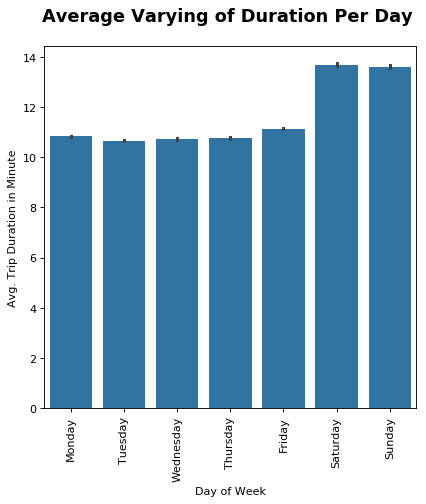

In [179]:
order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig=plt.figure(figsize=(6,6), dpi= 80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90);


#plotting a bar plot


sb.barplot(data=df, x='start_day', y='duration_minute', color=base_color,order=order);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title('Average Varying of Duration Per Day ', y=1.05, fontsize=16, fontweight='bold', color = 'black');

What we observe:
* Average duration is pretty consistent throughout the weekdays
* During the weekends it increases as people havea bit free time. (Though number of users decreases)

<b>Now lets see how the trip duration varies by month</b>

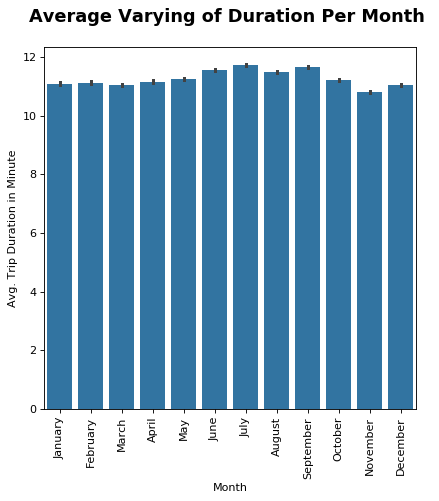

In [180]:
fig=plt.figure(figsize=(6,6), dpi= 80, facecolor='w', edgecolor='k')
order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


#plotting a bar plot
sb.barplot(data=df, x='start_month', y='duration_minute', color=base_color,order=order);
plt.xticks(rotation=90);
plt.xlabel('Month');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title('Average Varying of Duration Per Month ', y=1.05, fontsize=16, fontweight='bold', color = 'black');

* Duration is pretty much consistent throughout all the months. Just a bit of spike in July but we can ignore that

<b>Now Lets see the weekly,monthly and daily usage between customers and subscribers</b>

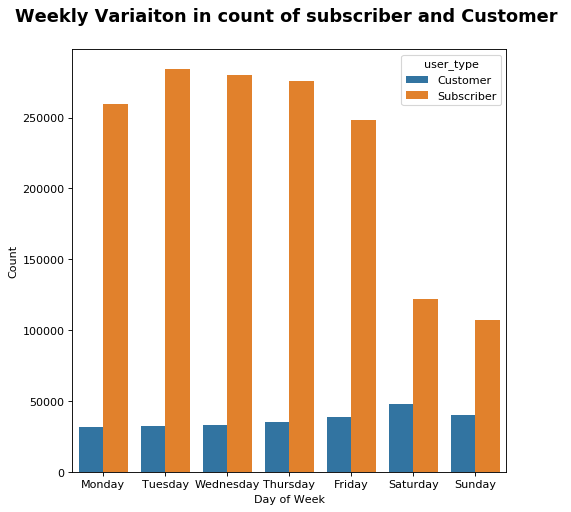

In [186]:
order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig=plt.figure(figsize=(7,7), dpi= 80, facecolor='w', edgecolor='k')



sb.countplot(data=df, x='start_day', hue='user_type',order=order);
plt.xlabel('Day of Week');
plt.ylabel('Count');
plt.title('Weekly Variaiton in count of subscriber and Customer ', y=1.05, fontsize=16, fontweight='bold', color = 'black');

Some interesting observations:
* Mostly subscribers prefer cycling on weekdays this means Mostly subscirbers are office going ppl
* Generally on weekdays the ratio is maintained(85:15)
* But on weekends there is a spike in customers and a substantial drop in subscribers again pointing out that office ppl are the one's who generally subscribe

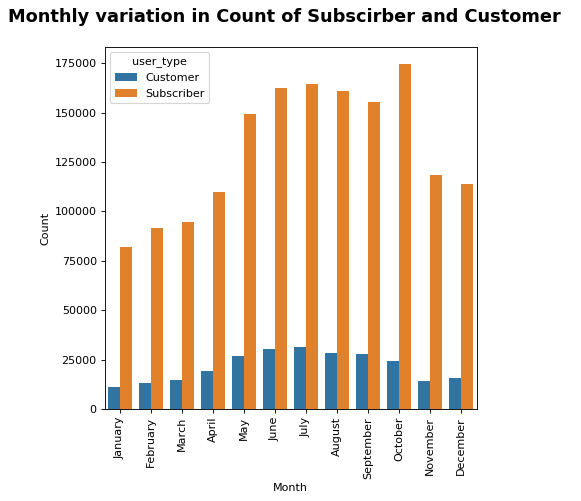

In [183]:
fig=plt.figure(figsize=(6,6), dpi= 80, facecolor='w', edgecolor='k')
order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

sb.countplot(data=df, x='start_month', hue='user_type',order=order);
plt.xticks(rotation=90);
plt.xlabel('Month');
plt.ylabel('Count');
plt.title('Monthly variation in Count of Subscirber and Customer  ', y=1.05, fontsize=16, fontweight='bold', color = 'black');

Observations:
* General spike in summer months and october (as estbld earlier)
* Both customers and subscibers increase in summer months and october <br>
Nothing Significant as such

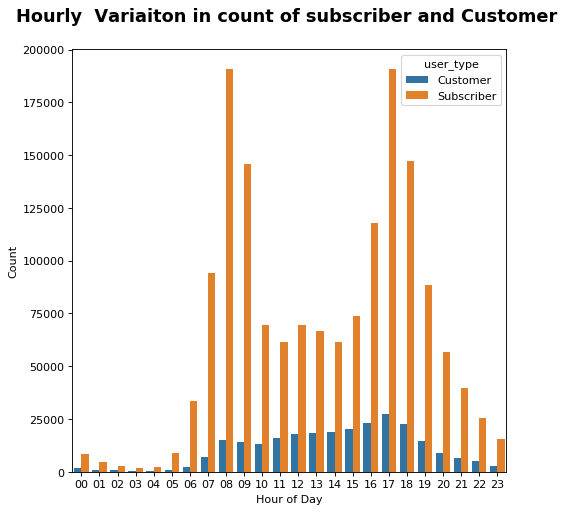

In [185]:

fig=plt.figure(figsize=(7,7), dpi= 80, facecolor='w', edgecolor='k')



sb.countplot(data=df, x='start_hour', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');
plt.title('Hourly  Variaiton in count of subscriber and Customer ', y=1.05, fontsize=16, fontweight='bold', color = 'black');

* Again same observations in the peak time both customers and subscribers increase but maintain the ratio throughout 

<b>Now lets see does the disrtibutuon vary between user the user types</b>

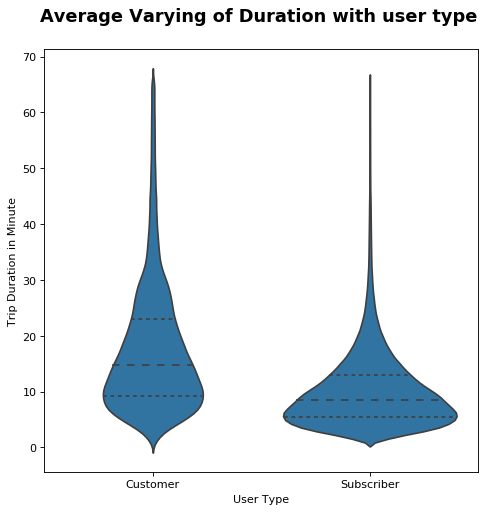

In [181]:

fig=plt.figure(figsize=(7,7), dpi= 80, facecolor='w', edgecolor='k')

#plotting a volin plot
sb.violinplot(data=df, x='user_type', y='duration_minute', color=base_color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');
plt.title('Average Varying of Duration with user type ', y=1.05, fontsize=16, fontweight='bold', color = 'black');

Observations:
* Subscribers generally have a fixed schedule and duration is narrower
* Customers are widely spread throughout. Most are casual customers and different customers have different demands


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> Well there are many intersting things that I observed. Firstly the no. of subscribers are  way high than customers. Generally subscirbers are  have a fixed schedule and prefer cycling on weekdays. Where as there is a steep increase in munber of customers on weekends. 
Also customers have diffent durations of commuting whereas the durations of subscribers are widely fixed.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
>Yeahh that many subscribers are mostly routine oriented and have fix duration and generally more on weekdays as opposed to variety of customers is pretty intererting thing



<h1 style="text-align:center;color:tomato;">Multivariate Exploration</h1>

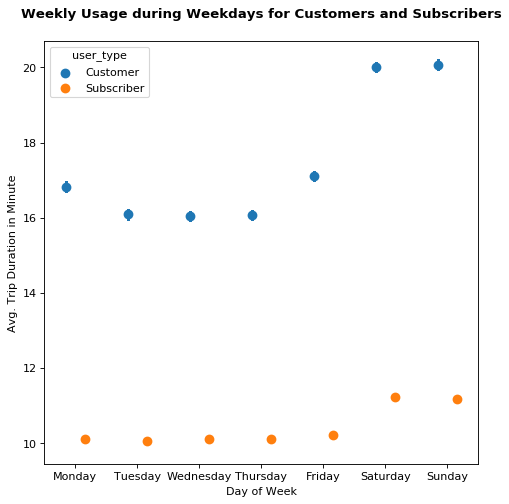

In [189]:
fig=plt.figure(figsize=(7,7), dpi= 80, facecolor='w', edgecolor='k')
order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.title("Weekly Usage during Weekdays for Customers and Subscribers", y = 1.04,fontweight='bold', color = 'black')




sb.pointplot(data=df, x='start_day', y='duration_minute', hue='user_type', dodge=0.3, linestyles="",order=order);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');


* Well customers have large duration each day especially on weekends
* Subscribers are consistent through all weekdays
* On the weekdays it is evident that casual customers increase and they go for long rides

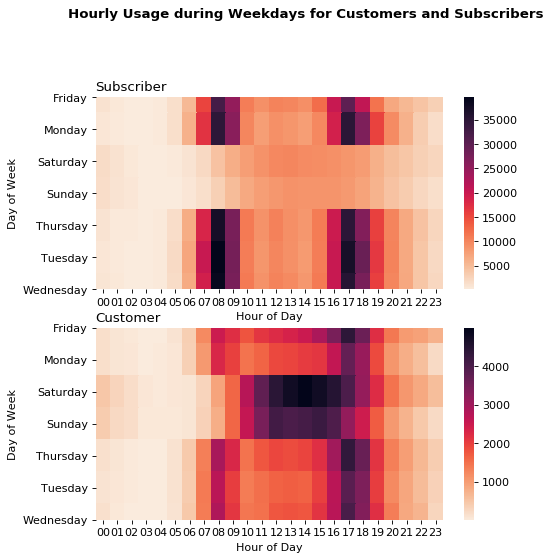

In [188]:
#adjusting the size
fig=plt.figure(figsize=(7,7), dpi= 80, facecolor='w', edgecolor='k')
order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#title
plt.suptitle("Hourly Usage during Weekdays for Customers and Subscribers", y = 1.04,fontweight='bold', color = 'black')
#subplot1
plt.subplot(2, 1, 1)
subscribers = df.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_day', 'start_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day', columns='start_hour', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='left');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');


#subplot2
plt.subplot(2, 1, 2)
customers = df.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_day', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day', columns='start_hour', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='left');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');



* Many trips for subscirbers are between 8Am and 5PM the regular office hours. While they might be some customers who also used to commute to office

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Well the observations from multivariate help strenthen the relationships. Subscirbers and customers vary alot. Subscirbers are consitent have a fixed schedule ,have lesser durations then customers. Customers vary widely. Steep increase on weekends . Customers are more leisurly oriented however there might be few customers who sometimes uses bike to commute from office as there is a steep increase in customers too at 8AM and 5PM

### Were there any interesting or surprising interactions between features?

Well after doing the through analysis all interactions make sense. Surely most of the observations were interesting. The difference in cycling schedules of customers and subscirbers was amazing but there was no elementof surprise as such.